# University Ranking Data Story

# Introduction

Higher education is becoming more and more important in today's world, as it can provide individuals with the knowledge, skills, and credentials necessary to succeed in their careers and contribute to society. However, not all universities are created equal, and the quality of education, research, and innovation can vary greatly across different regions and countries.

In this data story, we will explore a dataset that contains information about the world universities rankings from 2011 to 2021. We will also create a sub story based on the 2011 data file. The entire dataset includes data on over 1614 universities from 94 countries, and ranks them based on several criteria such as teaching score, research score, citations per faculty, and overall score.

We will use python libraries and data a visualization tool (Power Bi) to gain insights into the dataset, and observe the following:- 

- Data covered over years from 2011-2021
  - General observations
  - Universities in the map
  
- Power Bi file (Link to Power Bi file)
  - You can view and interact with our data visualization by accessing the link above.

- DataStory of 2011 data
   - Co-relation between all the columns.
   - Average overall scores of universities by location
   - Teaching score vs Overall score
   - Research score vs Overall score
   - Top universities
 
- Data story of location and universities.
   - Location vs Overall Score
   - Number of universities by location
   - Industry income vs Location

What are the trends and challenges facing the higher education sector, and how can data help us address them?
By exploring this dataset, we hope to gain a better understanding of the global higher education landscape, and provide insights that can inform policy, research, and innovation in the field."

# Thought Process

We explored the world university rankings dataset and realized the potential for uncovering insights about the global higher education landscape.

To start, we conducted a preliminary analysis of the dataset and noticed some interesting trends, such as the high rank of the universities in Europe and the USA. We decided to focus on these trends and used a line plot to visualize the average scores_teaching and scores_research of universities located in these regions, over a period of 10 years from 2011 to 2021.

To investigate the relationships between different variables in the dataset, we will create a correlation matrix and included it in our story.

In addition to the correlation matrix, we will also include a map visualization that shows the location of universities in different regions across the world for the year 2011.

Our main goal with this data story is to provide insights into the trends and rankings of various universities across the world.

`Note`:- We are using cleaned data here for visulization.

### Importing important libraries for the project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from geopy.geocoders import Nominatim
import folium

### Information about dataset

In [3]:
# reading the dataset
df = pd.read_csv(r"https://raw.githubusercontent.com/AugustHottie/uni_rankings/main/Dataset/Cleaned_data.csv")

#Explore the dataset
df.tail()


,Year,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,...,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited
8863,2021,1570,191,Tufts University,57.3,1570,46.7,130,50.0,591,...,768,33.0,317,95.5,71,United States,NaN,NaN,NaN,NaN
8864,2021,1720,191,University of Notre Dame,56.0,1720,52.1,95,57.3,468,...,797,45.5,156,71.5,379,United States,NaN,NaN,NaN,NaN
8865,2021,1760,191,"Northeastern University, US",55.8,1760,36.7,278,76.0,243,...,927,29.1,394,98.2,34,United States,NaN,NaN,NaN,NaN
8866,2021,1840,191,Arizona State University (Tempe),55.2,1840,38.2,246,62.8,385,...,862,47.8,141,79.1,283,United States,NaN,NaN,NaN,NaN
8867,2021,1880,191,George Washington University,54.9,1880,46.9,127,55.9,488,...,1209,33.3,310,85.8,194,United States,NaN,NaN,NaN,NaN


As we can see we have following important columns in the dataset:-

 - world_rank: The world ranking of the university.
 - university_name: The name of the university.
 - country: The country where the university is located.
 - teaching: The score for teaching quality, based on factors such as the ratio of students to faculty members and the number of faculty members with PhDs.
 - international outlook: The score for international outlook, based on factors such as the proportion of international students and faculty members, and the university's collaborations with other institutions.
 - research: The score for research output, based on factors such as the number of publications, citations, and awards.
 - citations: The score for research impact, based on factors such as the number of citations per paper and the number of highly cited papers.
 - income: The score for industry income, based on factors such as the research funding and the number of faculty members who have won prestigious awards or grants.
 - total_score: The overall score for the university, calculated as a weighted average of the above scores.

# General Observations

Let's start our obseravtion by seeing all the universities in a map so we can get idea where all the universities are located.

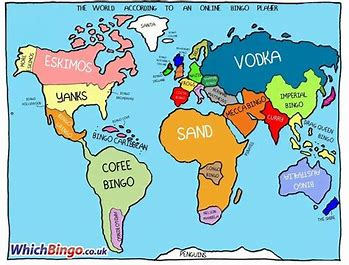

### Map

In [4]:
unique_df = df[['name', 'location']].drop_duplicates()
unique_df

,name,location
0,University of Edinburgh,United Kingdom
1,University of British Columbia,Canada
2,National University of Singapore,Singapore
3,McGill University,Canada
4,University of Melbourne,Australia
...,...,...
8609,Kochi University of Technology,Japan
8613,Kyoto Sangyo University,Japan
8629,Osaka Institute of Technology,Japan
8633,Ryukoku University,Japan


As we have so many universities let's just map the universities from 2011 data set.

In [5]:
df_2011 = df[df["Year"]==2011]
# Unique universities name and location
unique_df = df_2011[['name', 'location']].drop_duplicates()

# Create a geolocator object
geolocator = Nominatim(user_agent="my_app")

# Define a function to get the latitude and longitude of a location
def get_lat_lon(location):
    try:
        # Use the geolocator to get the latitude and longitude of the location
        geocode = geolocator.geocode(location)
        lat = geocode.latitude
        lon = geocode.longitude
        return lat, lon
    except:
        # Return NaN if the location cannot be geocoded
        return float('nan'), float('nan')

# Apply the function to the "University" column to get the latitude and longitude of each university
unique_df[["Latitude", "Longitude"]] = unique_df["name"].apply(lambda x: pd.Series(get_lat_lon(x)))

# Print the first few rows of the updated dataset
unique_df.head()

,name,location,Latitude,Longitude
0,University of Edinburgh,United Kingdom,55.944076,-3.188374
1,University of British Columbia,Canada,49.257831,-123.246242
2,National University of Singapore,Singapore,1.296202,103.776899
3,McGill University,Canada,45.506918,-73.579116
4,University of Melbourne,Australia,-37.803827,144.959706


In [6]:
location_counts = unique_df.groupby(["name", "Latitude", "Longitude"]).size().reset_index(name="Count")

# Create a map centered at (0, 0)
map = folium.Map(location=[0, 0], zoom_start=2)

# Add a bubble marker for each location with the number of universities as the size of the marker
for i, row in location_counts.iterrows():
    folium.CircleMarker(location=[row["Latitude"], row["Longitude"]], radius=row["Count"],tooltip = row["name"], color="blue", fill=True, fill_color="blue", fill_opacity=0.4).add_to(map)

# Display the map
map

`Conclusion`:- From the map we can see that most of the universities in our data are located in North America, Europe, Asia.

As we can see that most of the universities are based in different regions, so next we will create a visualization that shows the average overall score of universities located in different regions across the world, over a period of 10 years from 2011 to 2021. The data has been grouped by location and year, and the average overall score for each location and year has been calculated. This visualization helps in understanding how the overall score of universities has evolved over the years in different regions, and can provide insights into the performance of universities in different parts of the world.

## Avarage University Score over years by location

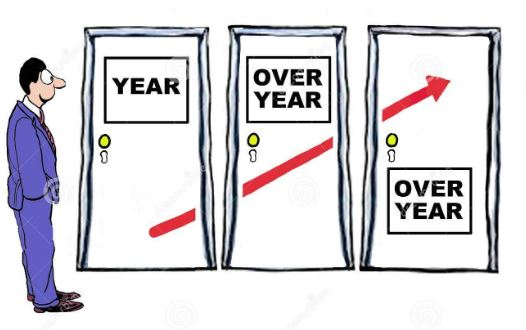

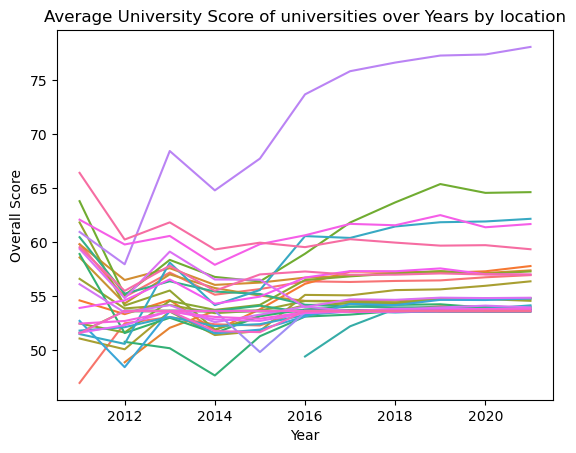

In [7]:

df_location_year_scores = df.groupby(['location', 'Year'])['scores_overall'].mean().reset_index()

# Create a lineplot to visualize the average score by location over the years
sns.lineplot(x='Year', y='scores_overall', hue='location', data=df_location_year_scores, legend = False)
plt.title('Average University Score of universities over Years by location')
plt.xlabel('Year')
plt.ylabel('Overall Score')
plt.show()


`Conclusion`:- From above graph we can conclude that:

- Overall, the average overall university score has remained relatively stable across all regions over the years, with minor fluctuations from year to year.

- The visualization can be a useful tool for policymakers and educators to identify regions and universities that are performing well, and to focus on improving the quality of education and research in regions where performance is lagging.

If we sum up we can say that, the "Average University Score by Location over Years", visualization provides valuable insights into the performance of universities in different regions over time, and can be used to inform policy and decision-making related to higher education.

# Data story of 2011 Data

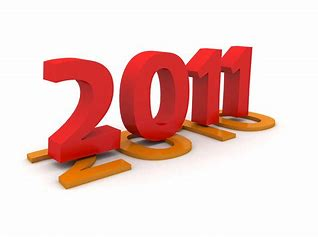

In [5]:
df_2011 = df[df["Year"]==2011]
df_2011

,Year,rank_order,rank,name,scores_overall,scores_overall_rank,scores_teaching,scores_teaching_rank,scores_international_outlook,scores_international_outlook_rank,...,scores_industry_income_rank,scores_research,scores_research_rank,scores_citations,scores_citations_rank,location,aliases,subjects_offered,closed,unaccredited
0,2011,40,40,University of Edinburgh,69.2,40,59.9,58,67.3,56,...,71,61.9,55,86.8,46,United Kingdom,University of Edinburgh,"Computer Science,Business & Management,Politic...",False,False
1,2011,30,30,University of British Columbia,73.8,30,65.1,42,93.3,12,...,69,74.8,28,80.3,68,Canada,University of British Columbia,"Psychology,Geography,Biological Sciences,Gener...",False,False
2,2011,34,34,National University of Singapore,72.9,34,65.5,39,97.8,4,...,77,72.6,32,78.7,74,Singapore,National University of Singapore nus,"Other Health,Sport Science,Accounting & Financ...",False,False
3,2011,35,35,McGill University,71.7,35,69.0,29,85.9,29,...,158,74.9,27,69.0,109,Canada,McGill University,"Accounting & Finance,Education,Biological Scie...",False,False
4,2011,36,36,University of Melbourne,71.0,36,58.7,64,88.0,22,...,58,69.2,37,83.3,57,Australia,University of Melbourne UniMelb Australia,"Art, Performing Arts & Design,Sociology,Medici...",False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
195,2011,164,164,Georgetown University,50.1,164,65.1,41,24.7,165,...,156,44.7,147,45.0,188,United States,Georgetown University,"Law,Languages, Literature & Linguistics,Accoun...",False,False
196,2011,197,197,University of Illinois Chicago,46.4,197,57.8,68,51.8,101,...,180,46.8,137,34.7,197,United States,University of Illinois Chicago,"Civil Engineering,Communication & Media Studie...",False,False
197,2011,17,17,University of Toronto,82.0,17,75.8,20,0.0,199,...,190,87.9,17,82.2,62,Canada,University of Toronto,Politics & International Studies (incl Develop...,False,False
198,2011,21,21,University of Hong Kong,79.2,21,68.4,30,91.4,14,...,45,71.4,35,96.1,15,Hong Kong,University of Hong Kong,"Agriculture & Forestry,Art, Performing Arts & ...",False,False


Let's start by observing the co-realations between all the colums

## Co-relation between all the columns.

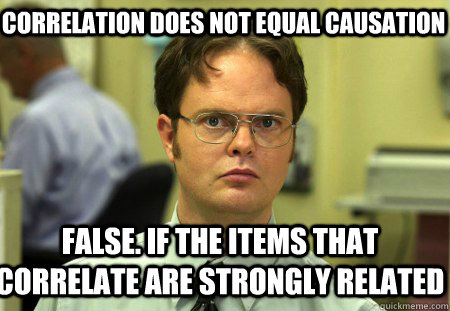

Memes apart let's observe it

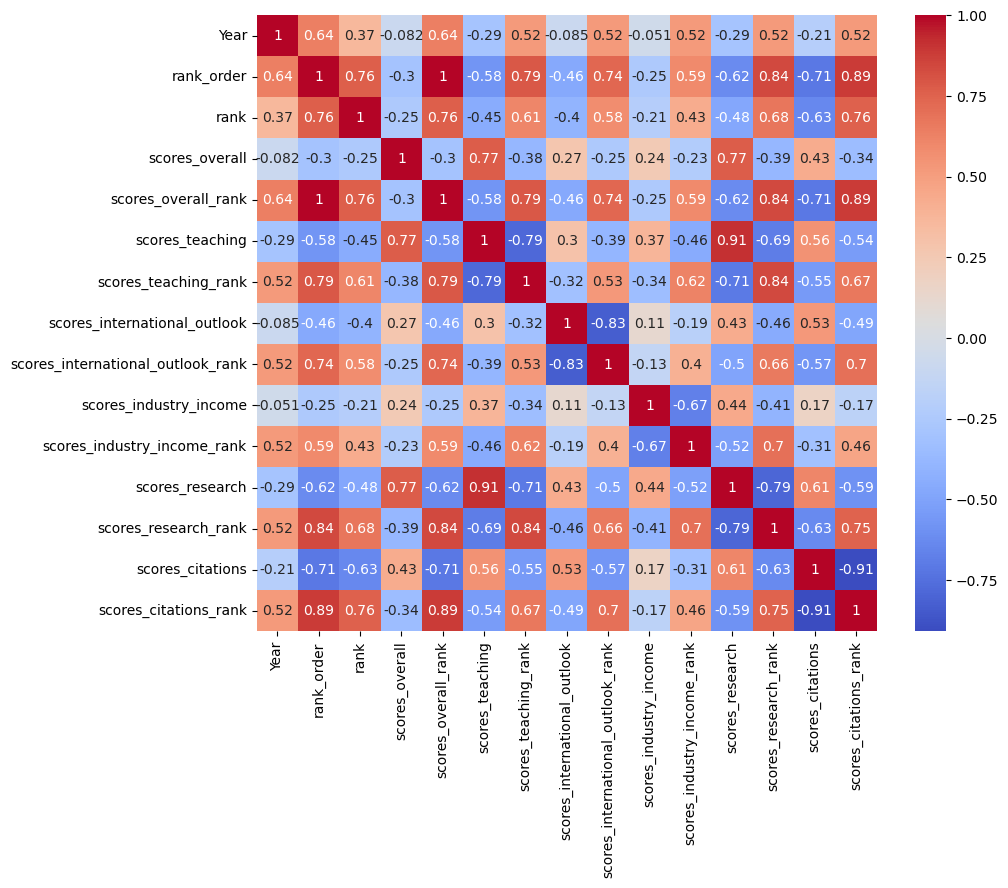

In [9]:
cols = df_2011.columns

plt.figure(figsize = (10,8))

# Create a correlation matrix
corr = df[cols].corr()

# Plot the correlation matrix using a heatmap
sns.heatmap(corr, cmap="coolwarm", annot=True)

# Show the plot
plt.show()

`Conclusion`:- From the co-relation matrix we can see that:

- Overall score is highly co-related with only teaching score and research score.
- Overall score is less co-related with international outlook and industry income and citation score.

So we can say that the ranking of the universities are highly dependent on teaching score, research score, citations score.

## 2011 dataset Sub Story

So first let's see how well universities performed in overall score during 2011

## Average overall scores of universities by location

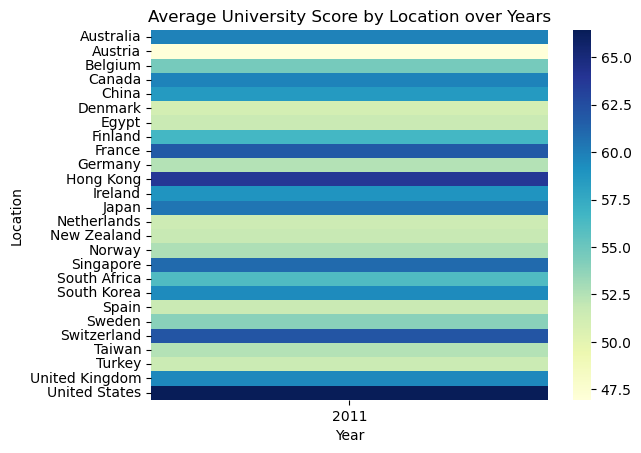

In [10]:
df_location_scores = df_2011.groupby(['location', 'Year'])['scores_overall'].mean().reset_index()
# Pivot the table to have location as rows, year as columns, and average score as values
df_pivot = df_location_scores.pivot(index='location', columns='Year', values='scores_overall')

# Create the heatmap
sns.heatmap(df_pivot, cmap='YlGnBu', yticklabels = True)

# Set the plot title and labels
plt.title('Average University Score by Location over Years')
plt.xlabel('Year')
plt.ylabel('Location')

# Show the plot
plt.show()

From the conclusion of co-relation matrix, we found that overall score is highly co-related with teaching score so let's confirm it by scatter plot.

## Teaching score vs Overall score

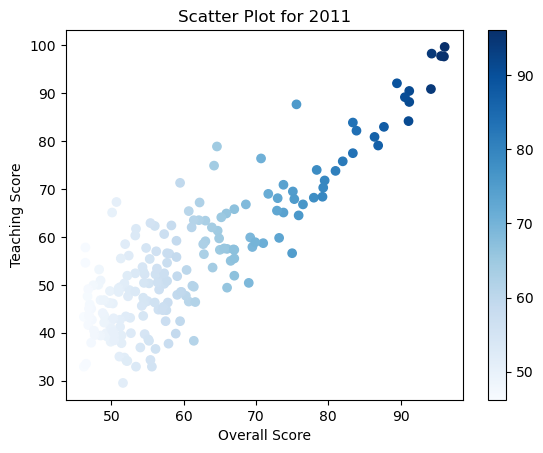

In [11]:
x = df_2011['scores_overall']
y = df_2011['scores_teaching']
cmap = plt.cm.get_cmap('Blues')
plt.scatter(x, y, c=x, cmap=cmap)
plt.colorbar()
plt.xlabel('Overall Score')
plt.ylabel('Teaching Score')
plt.title(f'Scatter Plot for 2011')
plt.show()

`Conclusion`:- From the scatter plot we can see that indeed teaching score and overall score are highly correlated.

Now let's see it with overall score and research score.

## Research score vs Overall score

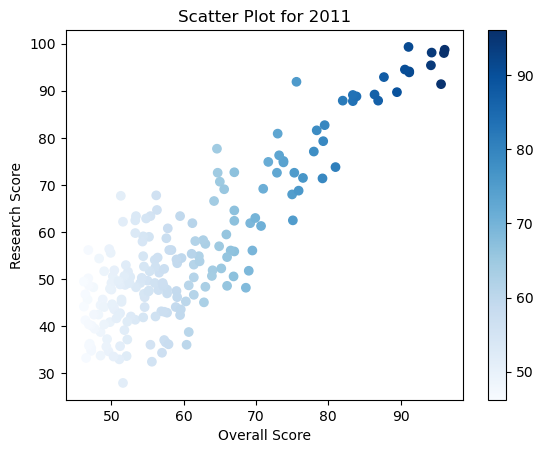

In [12]:
x = df_2011['scores_overall']
y = df_2011['scores_research']
cmap = plt.cm.get_cmap('Blues')
plt.scatter(x, y, c=x, cmap=cmap)
plt.colorbar()
plt.xlabel('Overall Score')
plt.ylabel('Research Score')
plt.title(f'Scatter Plot for 2011')
plt.show()

Now let's see which are the top 10 universities in year 2011 by column teaching score, research score and overall score to confirm our conclusion of co-relation matrix.

##  Top Universities

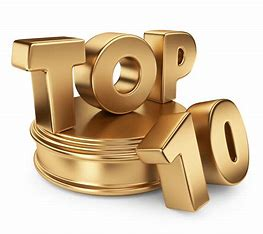

### Based on Overall Score

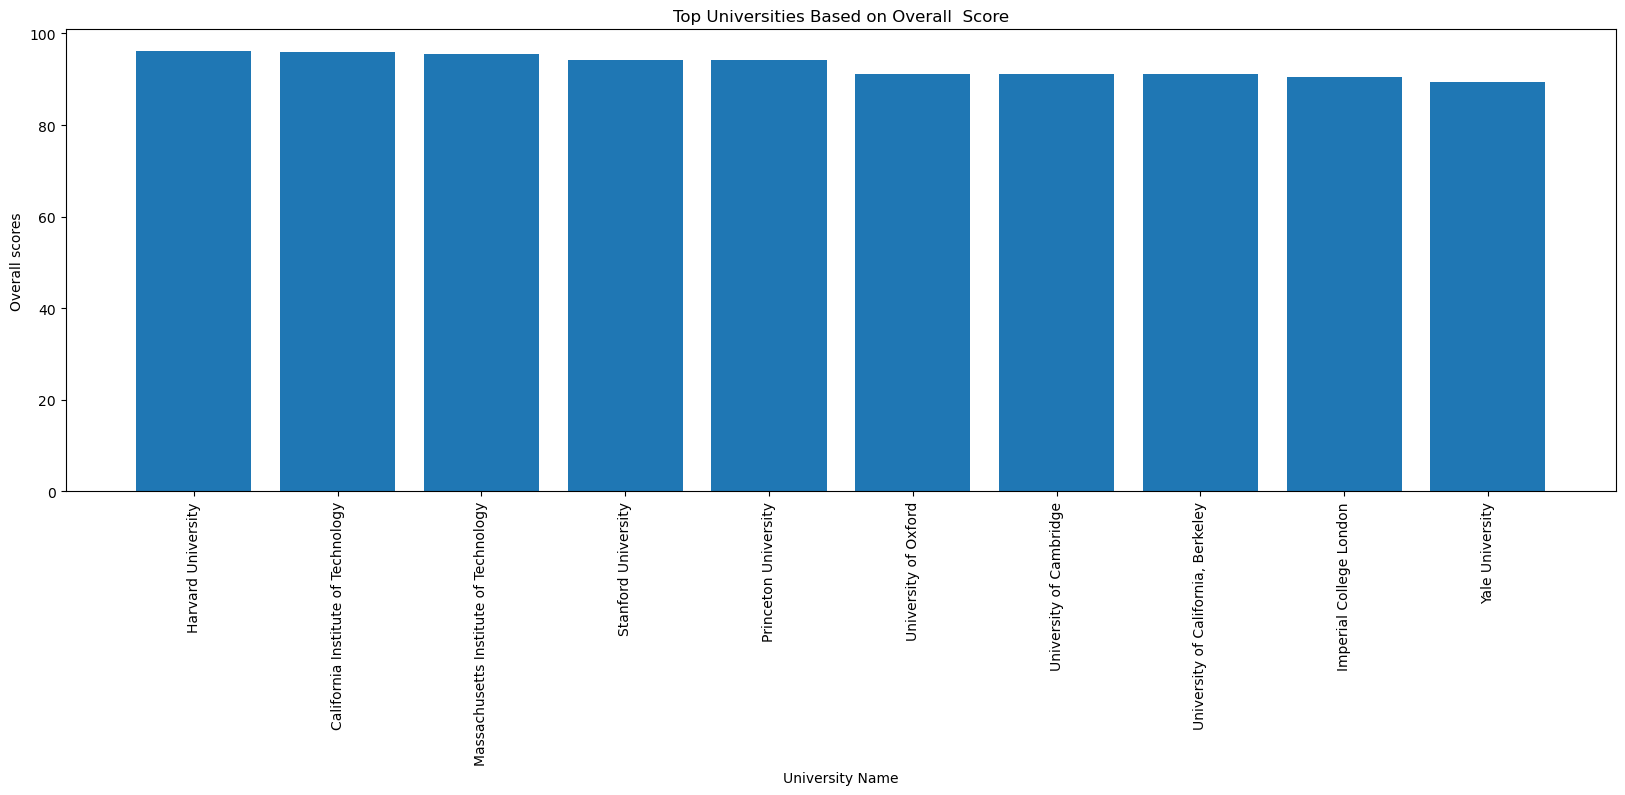

In [13]:
df_sorted = df_2011.sort_values('scores_overall', ascending=False)

# Extract the top universities and their scores
top_universities = df_sorted.head(10) # You can specify the number of top universities to display here

# Create a bar chart
plt.figure(figsize=(20, 6))
plt.bar(top_universities['name'], top_universities['scores_overall'])
plt.xlabel('University Name')
plt.ylabel('Overall scores')
plt.title('Top Universities Based on Overall  Score')
plt.xticks(rotation=90)
plt.show()

### Based on Teaching Score

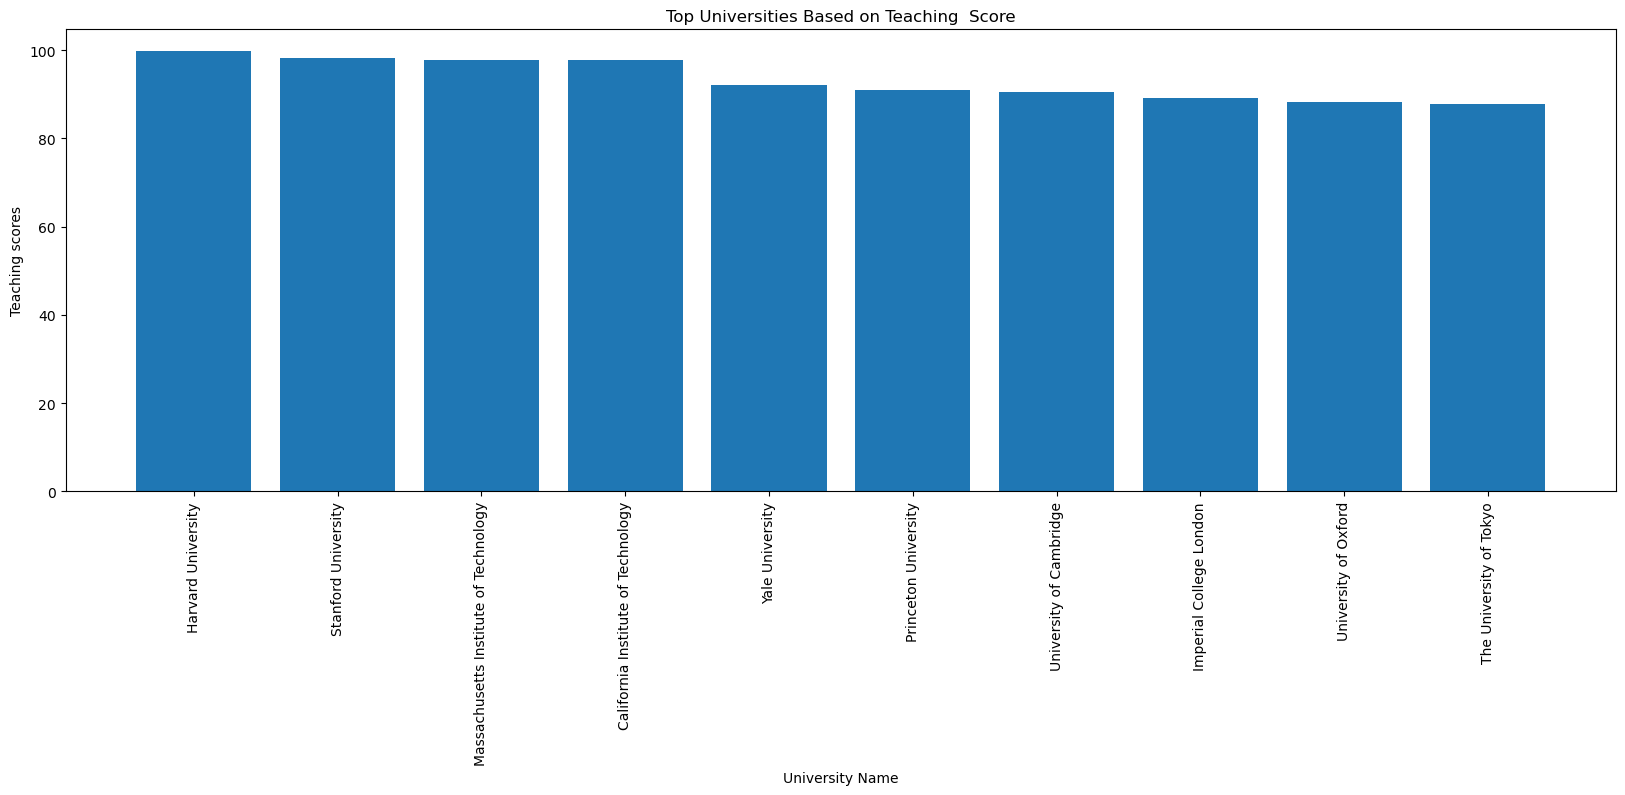

In [14]:
df_sorted = df_2011.sort_values('scores_teaching', ascending=False)

# Extract the top universities and their scores
top_universities = df_sorted.head(10) # You can specify the number of top universities to display here

# Create a bar chart
plt.figure(figsize=(20, 6))
plt.bar(top_universities['name'], top_universities['scores_teaching'])
plt.xlabel('University Name')
plt.ylabel('Teaching scores')
plt.title('Top Universities Based on Teaching  Score')
plt.xticks(rotation=90)
plt.show()

### Based on Research Score

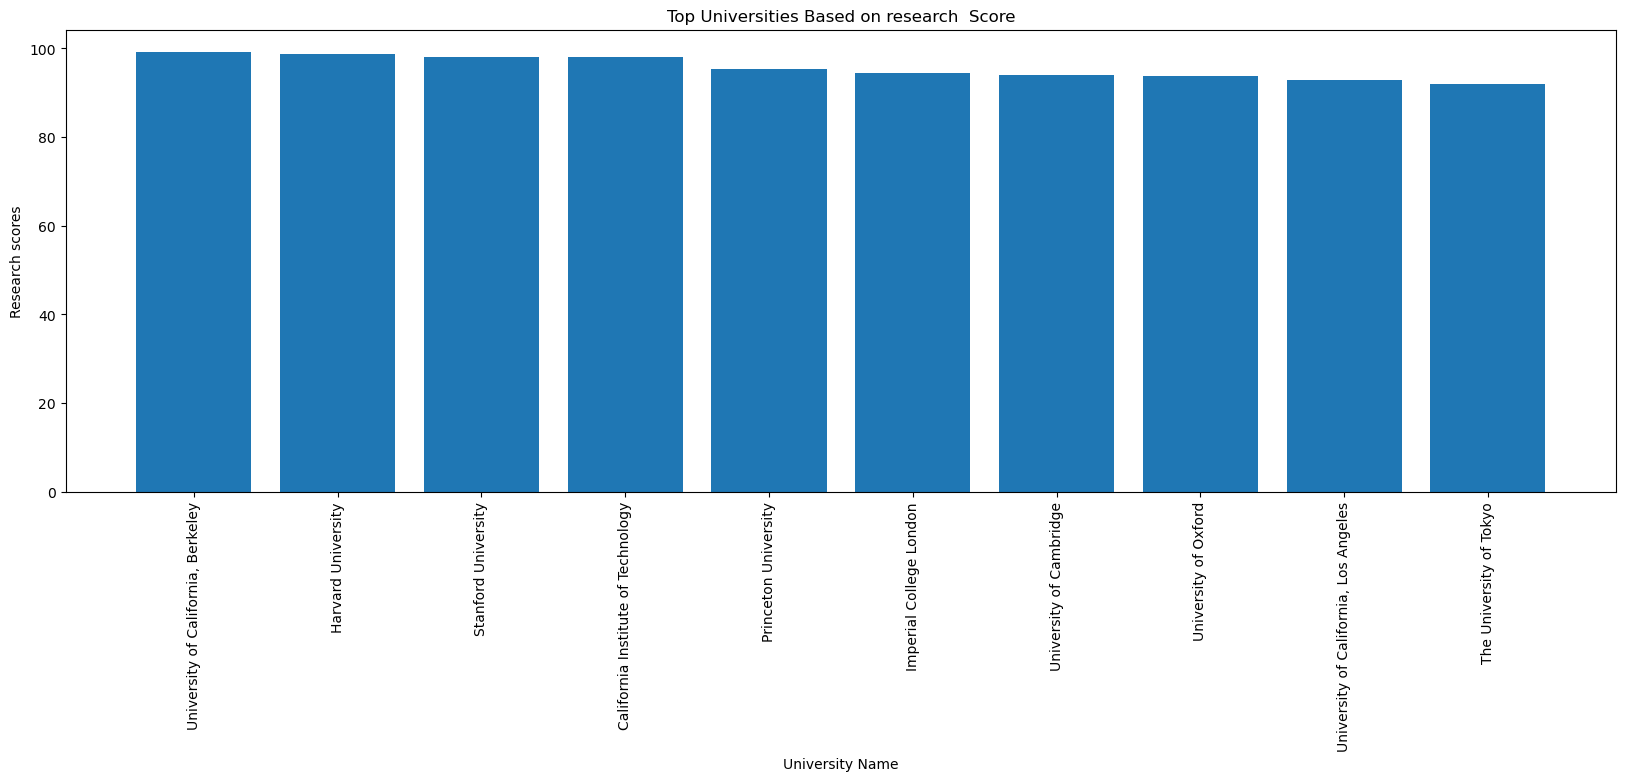

In [15]:
df_sorted = df_2011.sort_values('scores_research', ascending=False)

# Extract the top universities and their scores
top_universities = df_sorted.head(10) # You can specify the number of top universities to display here

# Create a bar chart
plt.figure(figsize=(20, 6))
plt.bar(top_universities['name'], top_universities['scores_research'])
plt.xlabel('University Name')
plt.ylabel('Research scores')
plt.title('Top Universities Based on research  Score')
plt.xticks(rotation=90)
plt.show()

`Conclusion`:- From above 4 graphs we can see that most of the universites are same in all 4 graphs so we can say that teaching, research scores really affect the overall score

# Data story of location and universities.

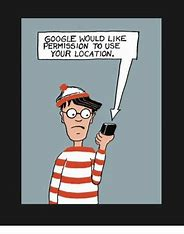

Generally we all want to graduate from the popular universities and where it is located is also something to consider.
So let's see how universities are performing by location.

## Location vs Overall Score

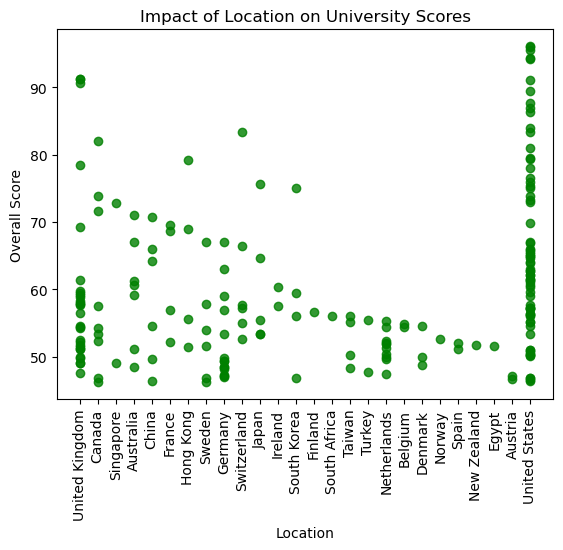

In [15]:
fig, ax = plt.subplots()


ax.scatter(df_2011['location'], df_2011['scores_overall'], c="green", alpha=0.8)

# Customize plot
ax.set_xlabel('Location',loc = "center")
ax.set_ylabel('Overall Score')
ax.set_title('Impact of Location on University Scores')
plt.xticks(rotation=90)
# plt.figure(figsize = (30,10))

# Show plot
plt.show()

`Conclusion: `
- We can clearly see location does impact the overall scores of universities, but it also can be due to high amount of universities there so let's see the number of universities by location.

## Number of universities by location


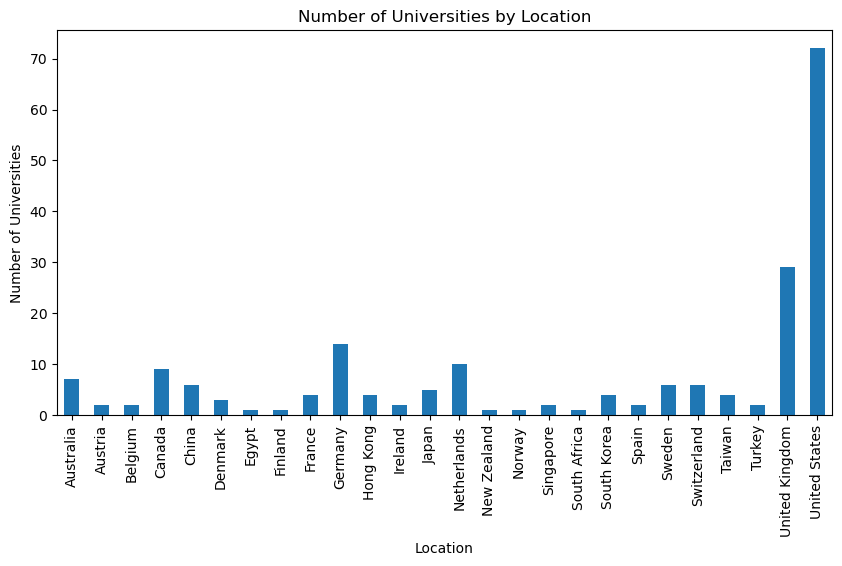

In [17]:
location_counts = df_2011.groupby('location')['name'].nunique()

# create a bar chart
location_counts.plot(kind='bar', figsize=(10, 5))
plt.title('Number of Universities by Location')
plt.xlabel('Location')
plt.ylabel('Number of Universities')
plt.show()

We can see we have more number of universities from the United States so we can't say that location actually impact the overall score.

But wait does it impact on industry income?

## Industry income vs Location

In [18]:
columns = ['location', 'scores_industry_income']
grouped = df_2011.groupby('location')['scores_industry_income'].mean().reset_index()
grouped.info

<bound method DataFrame.info of           location  scores_industry_income
0        Australia               56.542857
1          Austria               31.000000
2          Belgium               97.400000
3           Canada               42.877778
4            China               63.600000
5          Denmark               61.033333
6            Egypt               36.000000
7          Finland               30.200000
8           France               32.475000
9          Germany               43.250000
10       Hong Kong               51.125000
11         Ireland               39.150000
12           Japan               66.000000
13     Netherlands               65.210000
14     New Zealand               61.100000
15          Norway               41.500000
16       Singapore               40.250000
17    South Africa               46.700000
18     South Korea               70.850000
19           Spain               35.000000
20          Sweden               62.933333
21     Switzerland    

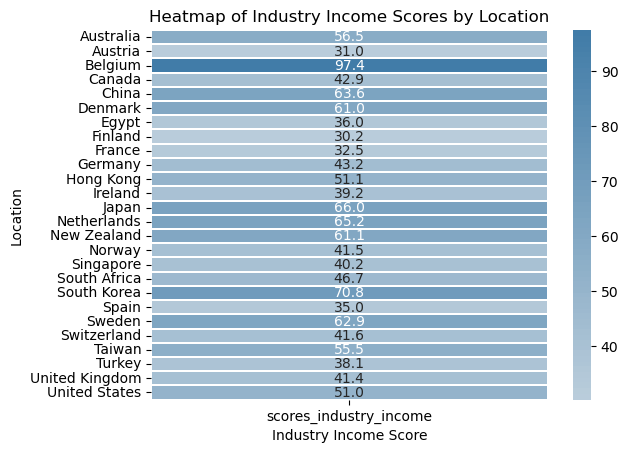

In [19]:
pivot_df = pd.pivot_table(grouped, values='scores_industry_income', index='location')

cmap = sns.diverging_palette(10, 240, n=200)

sns.heatmap(pivot_df, cmap=cmap, center=0, annot=True, fmt='.1f',linewidths=0.1, yticklabels = True)

plt.xlabel('Industry Income Score')
plt.ylabel('Location')
plt.title('Heatmap of Industry Income Scores by Location')

plt.show()

`Conclusion`:- As we can see belgium has the highest indusrty income.

`Conclusions`:- 

- General Observations
  - Overall, the average overall university score has remained relatively stable across all regions over the years, with minor fluctuations from year to year.

- 2011 Data story.
  - Overall score or ranking depends on the parameters teaching score, research score

- Locations and ranking
  - Location does impact the rankings but we can't say that confirmed because we don't have all the university data in 2011.
  - Location may impact the industry income

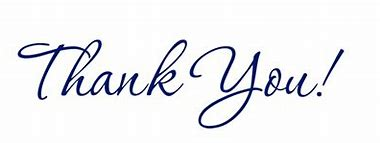